# Import required libraries :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense , Input , Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error , r2_score
from sklearn.tree import plot_tree
import seaborn as sns
%matplotlib inline

In [2]:
print(tf.__version__)

2.8.0


# Import data :

In [3]:
df_x=pd.read_csv("C:/Users/Saberi/Downloads/qm9_features32.csv")
y=pd.read_csv("C:/Users/Saberi/Downloads/qm9_labels.csv")

In [4]:
df_x.head()

,"('BalabanJ', <class 'numpy.float64'>)","('BertzCT', <class 'numpy.float64'>)","('Chi0', <class 'numpy.float64'>)","('Chi0n', <class 'numpy.float64'>)","('Chi0v', <class 'numpy.float64'>)","('Chi1', <class 'numpy.float64'>)","('Chi1n', <class 'numpy.float64'>)","('Chi1v', <class 'numpy.float64'>)","('Chi2n', <class 'numpy.float64'>)","('Chi2v', <class 'numpy.float64'>)",...,"('fr_piperdine', <class 'numpy.float64'>)","('fr_piperzine', <class 'numpy.float64'>)","('fr_priamide', <class 'numpy.float64'>)","('fr_pyridine', <class 'numpy.float64'>)","('fr_quatN', <class 'numpy.float64'>)","('fr_term_acetylene', <class 'numpy.float64'>)","('fr_tetrazole', <class 'numpy.float64'>)","('fr_unbrch_alkane', <class 'numpy.float64'>)","('fr_urea', <class 'numpy.float64'>)","('qed', <class 'numpy.float64'>)"
0,0.000020,0.000577,3.875255e-15,2.722966e-11,1.025154e-07,4.102548e-13,1.635214e-11,0.000019,0.000001,2.209078e-07,...,2.388156e-20,0.0,8.336724e-25,0.156951,4.034345e-08,2.957989e-11,0.168378,4.703598e-08,0.166633,0.187493
1,0.000020,0.000577,3.875255e-15,2.722966e-11,1.025154e-07,4.102548e-13,1.635214e-11,0.000019,0.000001,2.209078e-07,...,2.388156e-20,0.0,8.336724e-25,0.156951,4.034345e-08,2.957989e-11,0.168378,4.703598e-08,0.166633,0.228070
2,0.000020,0.000577,3.875255e-15,2.722966e-11,1.025154e-07,4.102548e-13,1.635214e-11,0.000019,0.000001,2.209078e-07,...,2.388156e-20,0.0,8.336724e-25,0.156951,4.034345e-08,2.957989e-11,0.168378,4.703598e-08,0.166633,0.156089
3,0.974937,0.000625,1.574798e-06,2.191668e-09,2.296717e-07,1.101185e-06,1.498512e-07,0.000038,0.000001,2.209078e-07,...,2.388156e-20,0.0,8.336724e-25,0.156951,4.034345e-08,1.000000e+00,0.168378,4.703598e-08,0.166633,0.160976
4,0.974937,0.000646,1.574798e-06,7.501717e-11,1.174156e-07,1.101185e-06,5.282567e-08,0.000033,0.000001,2.209078e-07,...,2.388156e-20,0.0,8.336724e-25,0.156951,4.034345e-08,2.957989e-11,0.168378,4.703598e-08,0.166633,0.197878


In [5]:
df_x.columns=list(range(1,164))

In [6]:
df_x.head()

,1,2,3,4,5,6,7,8,9,10,...,154,155,156,157,158,159,160,161,162,163
0,0.000020,0.000577,3.875255e-15,2.722966e-11,1.025154e-07,4.102548e-13,1.635214e-11,0.000019,0.000001,2.209078e-07,...,2.388156e-20,0.0,8.336724e-25,0.156951,4.034345e-08,2.957989e-11,0.168378,4.703598e-08,0.166633,0.187493
1,0.000020,0.000577,3.875255e-15,2.722966e-11,1.025154e-07,4.102548e-13,1.635214e-11,0.000019,0.000001,2.209078e-07,...,2.388156e-20,0.0,8.336724e-25,0.156951,4.034345e-08,2.957989e-11,0.168378,4.703598e-08,0.166633,0.228070
2,0.000020,0.000577,3.875255e-15,2.722966e-11,1.025154e-07,4.102548e-13,1.635214e-11,0.000019,0.000001,2.209078e-07,...,2.388156e-20,0.0,8.336724e-25,0.156951,4.034345e-08,2.957989e-11,0.168378,4.703598e-08,0.166633,0.156089
3,0.974937,0.000625,1.574798e-06,2.191668e-09,2.296717e-07,1.101185e-06,1.498512e-07,0.000038,0.000001,2.209078e-07,...,2.388156e-20,0.0,8.336724e-25,0.156951,4.034345e-08,1.000000e+00,0.168378,4.703598e-08,0.166633,0.160976
4,0.974937,0.000646,1.574798e-06,7.501717e-11,1.174156e-07,1.101185e-06,5.282567e-08,0.000033,0.000001,2.209078e-07,...,2.388156e-20,0.0,8.336724e-25,0.156951,4.034345e-08,2.957989e-11,0.168378,4.703598e-08,0.166633,0.197878


In [7]:
y.head()

,mu,alpha,homo,lumo,gap,r2,zpve,cv,u0,u298,h298,g298
0,0.0000,13.21,-0.3877,0.1171,0.5048,35.3641,0.044749,6.469,-40.478930,-40.476062,-40.475117,-40.498597
1,1.6256,9.46,-0.2570,0.0829,0.3399,26.1563,0.034358,6.316,-56.525887,-56.523026,-56.522082,-56.544961
2,1.8511,6.31,-0.2928,0.0687,0.3615,19.0002,0.021375,6.002,-76.404702,-76.401867,-76.400922,-76.422349
3,0.0000,16.28,-0.2845,0.0506,0.3351,59.5248,0.026841,8.574,-77.308427,-77.305527,-77.304583,-77.327429
4,2.8937,12.99,-0.3604,0.0191,0.3796,48.7476,0.016601,6.278,-93.411888,-93.409370,-93.408425,-93.431246


In [8]:
for i in y.columns:
  y[i]=y[i]/np.max(np.abs(y[i]))

In [9]:
y.head()

,mu,alpha,homo,lumo,gap,r2,zpve,cv,u0,u298,h298,g298
0,0.000000,0.067185,-0.904573,0.605168,0.811445,0.010479,0.163351,0.137729,-0.056648,-0.056645,-0.056643,-0.056673
1,0.055000,0.048113,-0.599627,0.428424,0.546375,0.007751,0.125420,0.134472,-0.079105,-0.079102,-0.079101,-0.079128
2,0.062629,0.032092,-0.683154,0.355039,0.581096,0.005630,0.078027,0.127786,-0.106924,-0.106922,-0.106920,-0.106944
3,0.000000,0.082799,-0.663789,0.261499,0.538659,0.017638,0.097980,0.182546,-0.108189,-0.108186,-0.108185,-0.108210
4,0.097904,0.066067,-0.840877,0.098708,0.610191,0.014445,0.060600,0.133663,-0.130725,-0.130723,-0.130722,-0.130746


---------------
# Neural Network
---------------

## Data Splitting for Neural Network model







In [10]:
x_train, x_test, y_train, y_test = train_test_split(df_x, y, test_size=0.1, random_state=23)

In [11]:
y_test.head()

,mu,alpha,homo,lumo,gap,r2,zpve,cv,u0,u298,h298,g298
106798,0.085657,0.396959,-0.541297,0.414987,0.502009,0.348253,0.666432,0.740276,-0.593670,-0.593664,-0.593664,-0.593689
8319,0.038418,0.348693,-0.524265,0.319380,0.460537,0.353508,0.601849,0.677340,-0.562797,-0.562791,-0.562790,-0.562818
114653,0.092088,0.346760,-0.547597,-0.136434,0.334834,0.320369,0.497499,0.631651,-0.642263,-0.642259,-0.642259,-0.642277
17059,0.069430,0.371681,-0.465236,0.373127,0.436586,0.286686,0.601831,0.652771,-0.510763,-0.510758,-0.510757,-0.510784
91717,0.126764,0.336080,-0.613859,0.022739,0.429834,0.283520,0.503705,0.596521,-0.642364,-0.642361,-0.642360,-0.642377


In [12]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(120496, 163)
(120496, 12)
(13389, 163)
(13389, 12)


# Building and Training a multi task Neural Network  



In [13]:
def reg_four_layer_model_config(n1=64,n2=32,n3=16,n4=12):
  input = Input(x_train.shape[1])
  model= Dense(n1, activation='relu')(input)
  #model=Dropout(0.1)(model)
  model=Dense(n2, activation='relu')(model)
  #model=Dropout(0.1)(model)
  model=Dense(n3, activation='relu')(model)
  #model=Dropout(0.1)(model)
  output=Dense(n4, activation='linear')(model)
  model=Model(inputs=input,outputs=output)
  return model

In [14]:
def comp(model,lr=0.05):
  model.compile(optimizer=Adam(learning_rate=lr),loss=tf.keras.losses.MeanAbsoluteError())
  return model

In [15]:
def plot_model(history):
    df=pd.DataFrame(history.history)
    plt.figure(figsize=(10,7))
    plt.plot(df['val_loss'])
    plt.plot(df['loss'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['validation loss','training loss'], loc='upper right')
    plt.title('Loss of train/validation sets vs Epochs')
    plt.ylim(0,0.2)
    plt.show()

In [16]:
model=reg_four_layer_model_config()

In [17]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 163)]             0         
                                                                 
 dense (Dense)               (None, 64)                10496     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 12)                204       
                                                                 
Total params: 13,308
Trainable params: 13,308
Non-trainable params: 0
_________________________________________________________________


In [18]:
model=reg_four_layer_model_config()
comp(model,lr=0.001)
history = model.fit(x_train, y_train,batch_size =256,epochs=30,validation_split = 0.1 ,verbose=1)

Epoch 1/30
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
408/424 [===========================>..] - ETA: 0s - loss: 0.0953WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001C63727EA68> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the fu

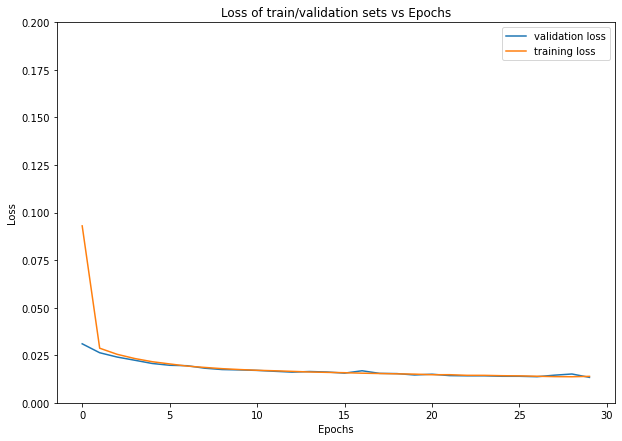

In [19]:
plot_model(history)

In [20]:
model.evaluate(x_test,y_test)

419/419 [==============================] - 0s 585us/step - loss: 0.0134


0.013361450284719467

In [21]:
y_pred=pd.DataFrame(model.predict(x_test),columns=y.columns)
y_true=y_test.copy()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [22]:
y_pred.head()

,mu,alpha,homo,lumo,gap,r2,zpve,cv,u0,u298,h298,g298
0,0.065075,0.403893,-0.548098,0.354204,0.489615,0.350589,0.672142,0.738276,-0.591512,-0.591419,-0.592692,-0.591413
1,0.068037,0.358083,-0.521505,0.325580,0.457393,0.368825,0.600907,0.681331,-0.559891,-0.557526,-0.558290,-0.557490
2,0.090608,0.349811,-0.557861,-0.120645,0.347427,0.320487,0.491028,0.625659,-0.640100,-0.639439,-0.641009,-0.639329
3,0.056958,0.371862,-0.516368,0.351543,0.463723,0.306452,0.604662,0.660468,-0.514978,-0.513133,-0.513936,-0.513101
4,0.101251,0.340897,-0.624711,-0.011339,0.428348,0.295946,0.500614,0.604565,-0.640244,-0.640245,-0.640946,-0.640367


In [23]:
y_pred.index=y_true.index
mae=dict()
for i in y.columns:
  mae[i]=np.sum(np.abs(y_pred[i]-y_true[i]))/y_pred.shape[0]
mae

{'mu': 0.026433272711096207,
 'alpha': 0.006172525003712794,
 'homo': 0.016466628630716698,
 'lumo': 0.040329440109431895,
 'gap': 0.016317639351722188,
 'r2': 0.018546634326009954,
 'zpve': 0.00922247948268678,
 'cv': 0.011432238774594828,
 'u0': 0.0038117664461761198,
 'u298': 0.003948555514802356,
 'h298': 0.0036726786003280346,
 'g298': 0.003983515154455357}

In [25]:
y_pred_train=pd.DataFrame(model.predict(x_train),columns=y.columns)
r2_score(y_train,y_pred_train)

0.905773688875927

In [26]:
r2_score(y_test, y_pred)

0.9057425794999006

Before we proceed to train a Network with only task gap as the response, let's have a look at our prediction responses and compare it to the real ones

In [27]:
yy=pd.read_csv("C:/Users/Saberi/Downloads/qm9_labels.csv")

In [28]:
for i in yy.columns:
  y_true[i]=y_true[i]*np.max(np.abs(yy[i]))
  y_pred[i]=y_pred[i]*np.max(np.abs(yy[i]))

In [29]:
y_true.head()

,mu,alpha,homo,lumo,gap,r2,zpve,cv,u0,u298,h298,g298
106798,2.5317,78.05,-0.2320,0.0803,0.3123,1175.2690,0.182565,34.770,-424.217691,-424.208666,-424.207722,-424.251144
8319,1.1355,68.56,-0.2247,0.0618,0.2865,1193.0015,0.164873,31.814,-402.156782,-402.148032,-402.147088,-402.190746
114653,2.7218,68.18,-0.2347,-0.0264,0.2083,1081.1665,0.136287,29.668,-458.940410,-458.932697,-458.931753,-458.972843
17059,2.0521,73.08,-0.1994,0.0722,0.2716,967.4953,0.164868,30.660,-364.975003,-364.966997,-364.966053,-365.007460
91717,3.7467,66.08,-0.2631,0.0044,0.2674,956.8113,0.137987,28.018,-459.012604,-459.005483,-459.004539,-459.044138


In [30]:
y_pred.head()

,mu,alpha,homo,lumo,gap,r2,zpve,cv,u0,u298,h298,g298
106798,1.923390,79.413483,-0.234915,0.068538,0.304590,1183.149902,0.184129,34.676109,-422.675293,-422.604614,-423.513763,-422.624817
8319,2.010929,70.406349,-0.223517,0.063000,0.284544,1244.693237,0.164615,32.001453,-400.080139,-398.385803,-398.931305,-398.383301
114653,2.678044,68.779747,-0.239099,-0.023345,0.216134,1081.565186,0.134514,29.386583,-457.395264,-456.917755,-458.038696,-456.866211
17059,1.683464,73.115570,-0.221315,0.068024,0.288482,1034.199341,0.165644,31.021500,-367.986938,-366.664612,-367.237640,-366.663116
91717,2.992623,67.027161,-0.267751,-0.002194,0.266476,998.745422,0.137140,28.395800,-457.497864,-457.493561,-457.994110,-457.607727


_______

# Building and Training a one task Neural Network  



In [31]:
model1=reg_four_layer_model_config(n4=1)

In [32]:
model1.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 163)]             0         
                                                                 
 dense_8 (Dense)             (None, 64)                10496     
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 13,121
Trainable params: 13,121
Non-trainable params: 0
_________________________________________________________________


In [33]:
model1=reg_four_layer_model_config(n4=1)
comp(model1,lr=0.01)
history1 = model1.fit(x_train ,y_train['gap'],batch_size =256,epochs=22,validation_split = 0.1 ,verbose=1)

Epoch 1/22
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
397/424 [===========================>..] - ETA: 0s - loss: 0.0306WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001C63721BAF8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the fu

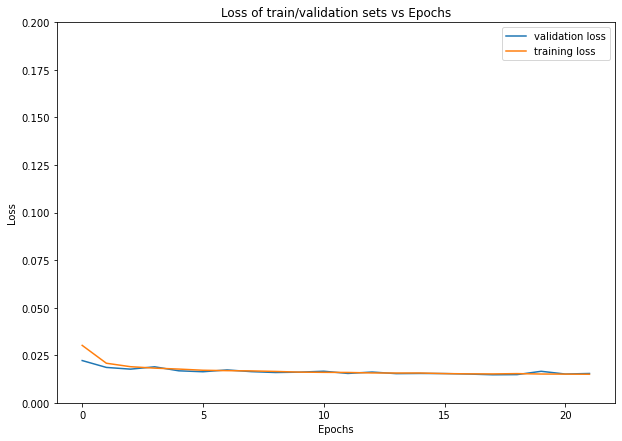

In [34]:
plot_model(history1)

In [35]:
model1.evaluate(x_test,y_test['gap'])

419/419 [==============================] - 0s 607us/step - loss: 0.0155


0.015479235909879208

In [36]:
y_pred1=pd.DataFrame(model1.predict(x_test))
y_true1=y_test['gap'].copy()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [38]:
y_pred1_train=pd.DataFrame(model1.predict(x_train))
r2_score(y_train['gap'],y_pred1_train)

0.9191987372545265

In [37]:
r2_score(y_true1, y_pred1)

0.9170248327154344

In [39]:
y_true1=y_true1*np.max(np.abs(yy['gap']))
y_pred1=y_pred1*np.max(np.abs(yy['gap']))

print(f"Prediction : {y_pred1} , True label : {y_true1}")

Prediction :               0
0      0.302278
1      0.283372
2      0.213042
3      0.292271
4      0.263959
...         ...
13384  0.255142
13385  0.230960
13386  0.212915
13387  0.313479
13388  0.223439

[13389 rows x 1 columns] , True label : 106798    0.3123
8319      0.2865
114653    0.2083
17059     0.2716
91717     0.2674
           ...  
113530    0.2508
36217     0.2272
6012      0.2158
121269    0.3121
10149     0.2253
Name: gap, Length: 13389, dtype: float64


---------------
# Decision Tree
---------------


## Data Splitting for decision tree






In [54]:
x_train, x_test, y_train, y_test = train_test_split(df_x, y['gap'], test_size=0.2, random_state=50)

In [55]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(107108, 163)
(107108,)
(26777, 163)
(26777,)


# Building Decision Tree by CP criterion



In [59]:
tree = DecisionTreeRegressor()
path =tree.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In the following plot, the maximum effective CP value is removed, because it is the trivial tree with only one node.

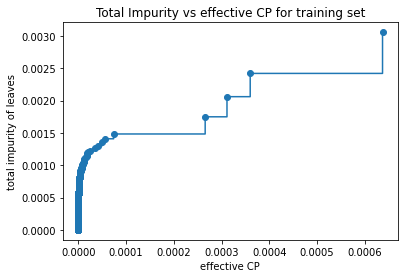

In [60]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective CP")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective CP for training set")
plt.show()

As you can see, greater alphas are corresponding to shallower trees with more impurities.

In [61]:
trees = []
for ccp_alpha in np.linspace(np.min(ccp_alphas),np.max(ccp_alphas),50):
    tree = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    tree.fit(x_train, y_train)
    trees.append(tree)

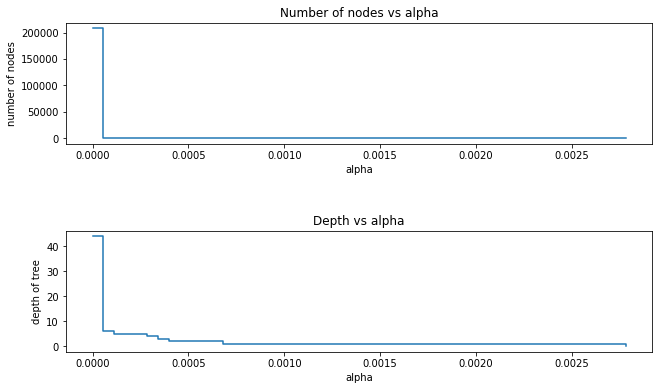

In [62]:
node_counts = [tree.tree_.node_count for tree in trees]
depth = [tree.tree_.max_depth for tree in trees]
fig, ax = plt.subplots(2, 1)
ax[0].plot(np.linspace(np.min(ccp_alphas),np.max(ccp_alphas),50), node_counts, drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(np.linspace(np.min(ccp_alphas),np.max(ccp_alphas),50), depth, drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()
fig.set_size_inches(10, 6)
plt.show()

In the above graphs, we showed that lower alphas are corresponded to more complex trees with more nodes and depth.

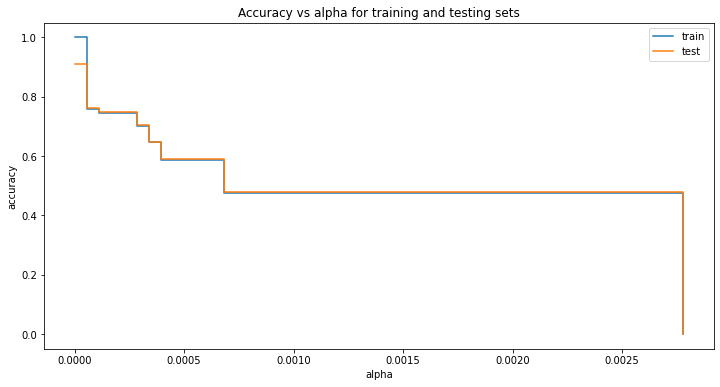

In [63]:
train_scores = [tree.score(x_train, y_train) for tree in trees]
test_scores = [tree.score(x_test, y_test) for tree in trees]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(np.linspace(np.min(ccp_alphas),np.max(ccp_alphas),50), train_scores, label="train", drawstyle="steps-post")
ax.plot(np.linspace(np.min(ccp_alphas),np.max(ccp_alphas),50), test_scores, label="test", drawstyle="steps-post")
ax.legend()
fig.set_size_inches(12, 6)
plt.show()

We are going to choose the most suitable alpha for CP, acoording to above graph.

In [64]:
tree = DecisionTreeRegressor(random_state=0, ccp_alpha=0.00025)
tree.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.00025, random_state=0)

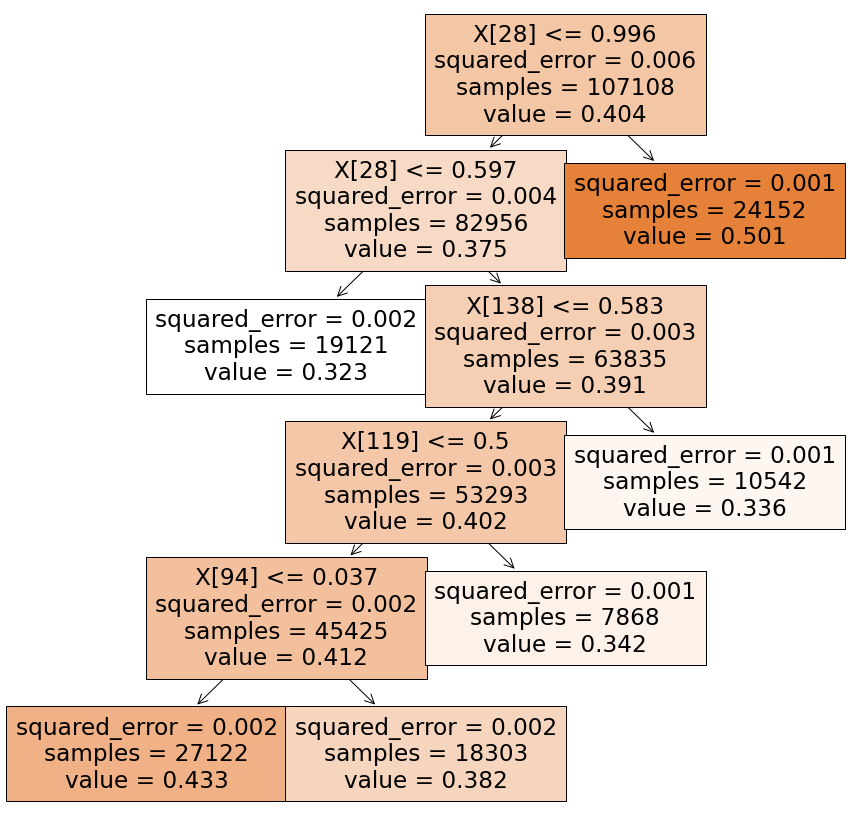

In [65]:
plt.figure(figsize=(15,15))
plot_tree(tree,filled=True)
plt.show()

In [66]:
y_pred2= tree.predict(x_test)

In [67]:
mae=mean_absolute_error(y_test,y_pred2)
mae

0.028839846747260423

In [68]:
y_pred2_train=pd.DataFrame(tree.predict(x_train))
r2_score(y_train,y_pred2_train)

0.7457337054338262

In [69]:
r2_score(y_test, y_pred2)

0.7499914935426755

# Building Decision Tree by modifying depth and number of leaf nodes

In [70]:
depth = []
for i in range(3,10):
    tree = DecisionTreeRegressor(max_depth=i)
    tree.fit(x_train, y_train)
    y_p= tree.predict(x_test)
    depth.append((i,mean_absolute_error(y_test,y_p)))
print(depth)

[(3, 0.03360006146103805), (4, 0.028735265763549397), (5, 0.025090033538196357), (6, 0.023246923197976815), (7, 0.021795081843554987), (8, 0.02051735869799514), (9, 0.019070901810248973)]


In [71]:
tree = DecisionTreeRegressor(max_depth=9)
tree.fit(x_train, y_train)
y_pred3= tree.predict(x_test)

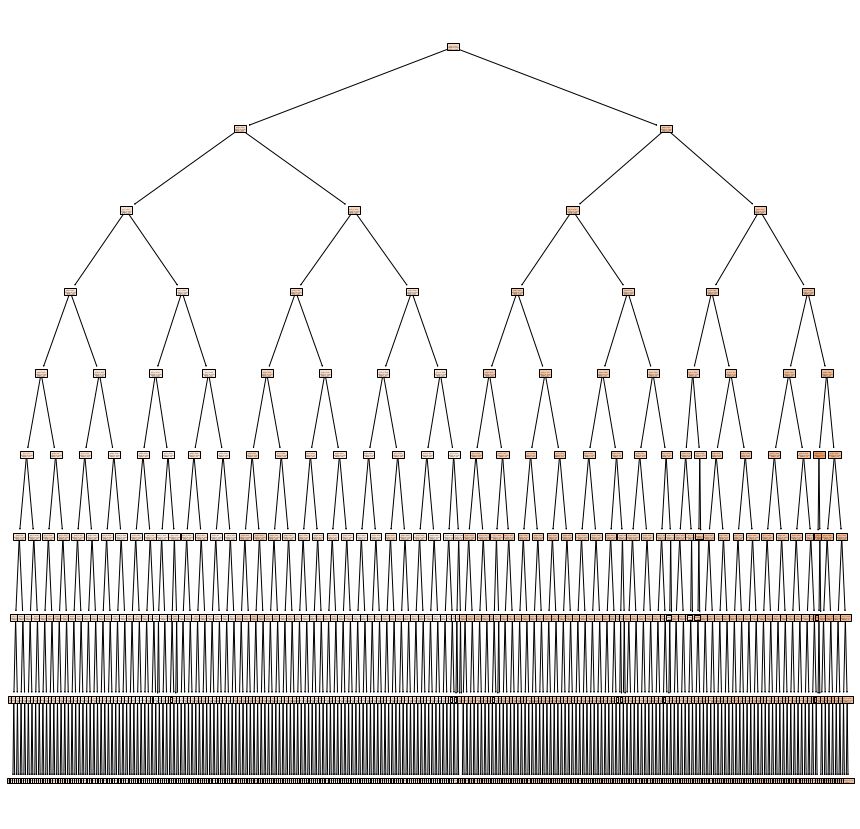

In [72]:
plt.figure(figsize=(15,15))
plot_tree(tree,filled=True)
plt.show()

In [73]:
y_pred3_train=pd.DataFrame(tree.predict(x_train))
r2_score(y_train,y_pred3_train)

0.8838537914905051

In [74]:
r2_score(y_test, y_pred3)

0.8775198415914626

In [82]:
tree = DecisionTreeRegressor(max_depth=4)
tree.fit(x_train, y_train)
y_pred4= tree.predict(x_test)

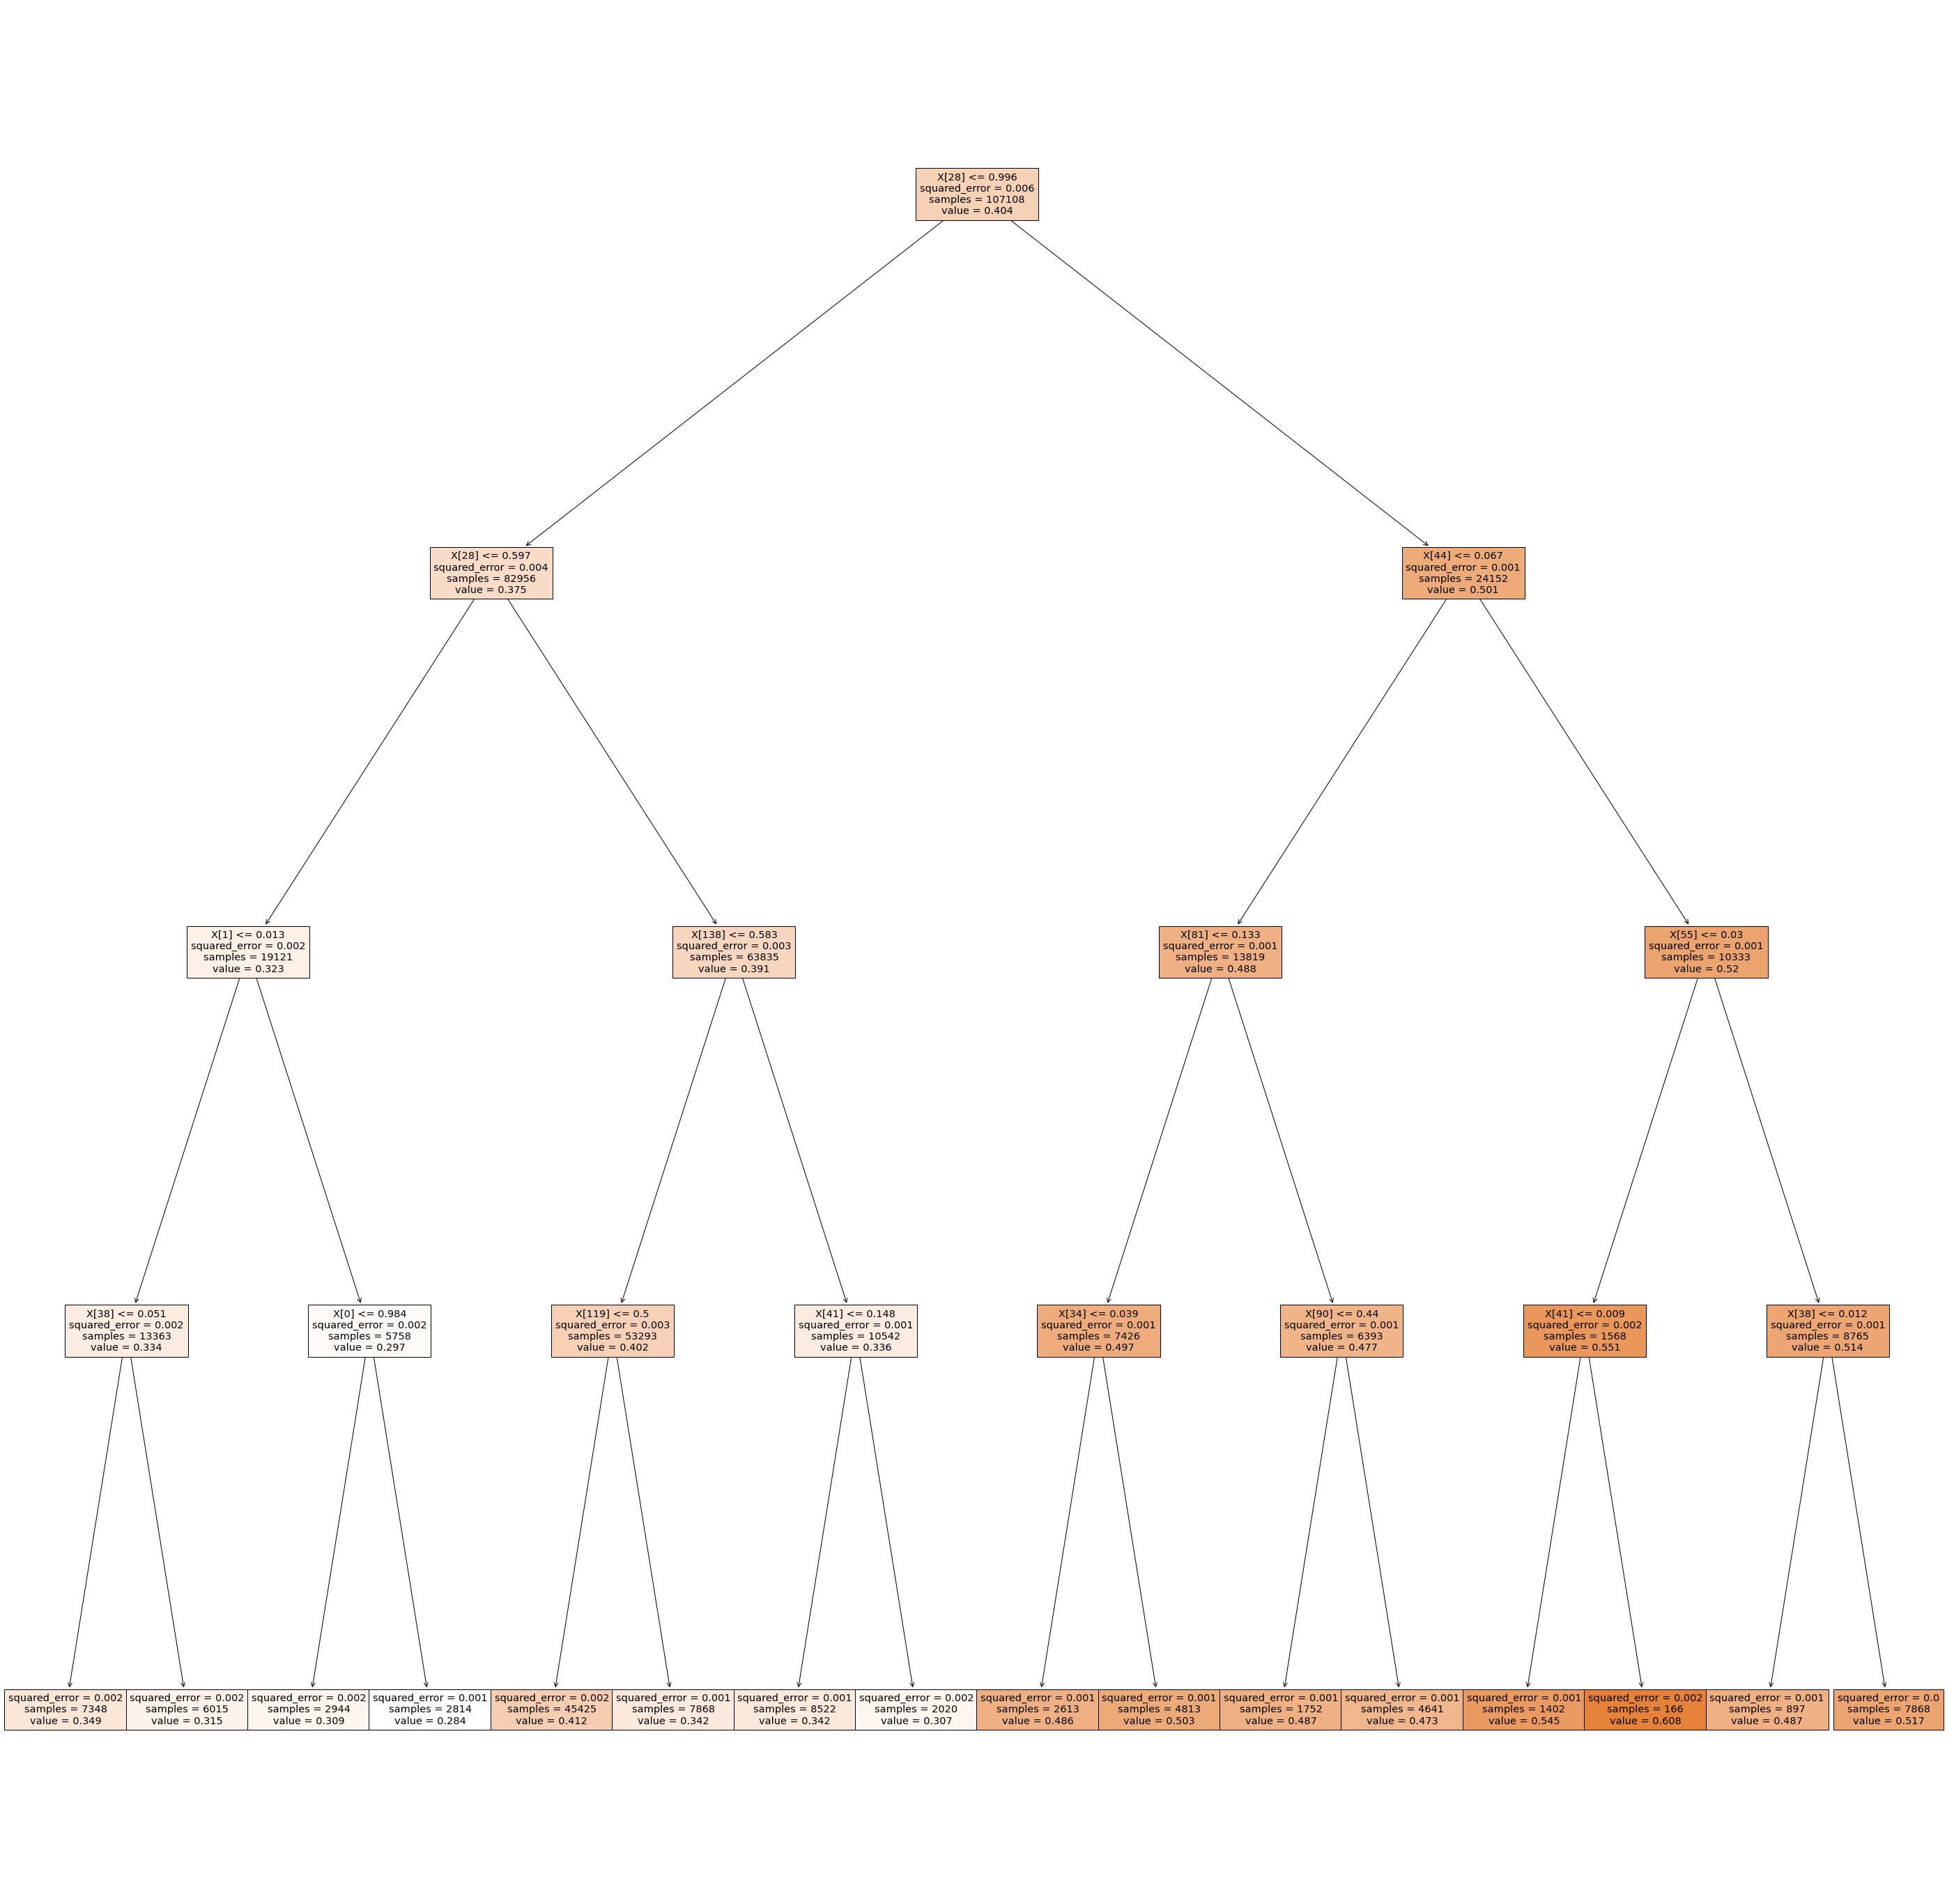

In [83]:
plt.figure(figsize=(50,50))
plot_tree(tree,filled=True)
plt.show()

In [84]:
mean_absolute_error(y_test,y_pred4)

0.028735265763549338

In [86]:
y_pred4_train=pd.DataFrame(tree.predict(x_train))
r2_score(y_train,y_pred4_train)

0.7379130650220895

In [87]:
r2_score(y_test, y_pred4)

0.7408963024494244